In [92]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
import json
import csv
from sklearn.metrics import classification_report
import matplotlib.colors as colo
import sklearn as sk
import sklearn.cluster as clstr
import array

from amb_sdk.sdk import DarwinSdk

In [93]:
# Login
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('claire.mcafee@gmail.com', 'Fhze5hUMn3')

if not status:
    print(msg)

In [94]:
# Code to convert new dataset file from json to csv

# path = 'datasets/'
# f = open('datasets/film_imdb.json')
# film_data = json.load(f)

# output = csv.writer(open("datasets/film_data.csv", "w"))
# output.writerow(film_data[0].keys())
# for item in film_data:
#     output.writerow(item.values())

b'Skipping line 11: expected 20 fields, saw 21\nSkipping line 31: expected 20 fields, saw 21\nSkipping line 42: expected 20 fields, saw 21\nSkipping line 51: expected 20 fields, saw 21\nSkipping line 57: expected 20 fields, saw 21\nSkipping line 66: expected 20 fields, saw 21\nSkipping line 71: expected 20 fields, saw 21\nSkipping line 74: expected 20 fields, saw 21\nSkipping line 75: expected 20 fields, saw 21\nSkipping line 80: expected 20 fields, saw 21\nSkipping line 94: expected 20 fields, saw 21\nSkipping line 104: expected 20 fields, saw 21\nSkipping line 122: expected 20 fields, saw 21\nSkipping line 141: expected 20 fields, saw 21\nSkipping line 170: expected 20 fields, saw 21\nSkipping line 178: expected 20 fields, saw 21\nSkipping line 189: expected 20 fields, saw 21\nSkipping line 193: expected 20 fields, saw 21\nSkipping line 200: expected 20 fields, saw 21\nSkipping line 206: expected 20 fields, saw 21\nSkipping line 210: expected 20 fields, saw 21\nSkipping line 217: exp

b'Skipping line 35163: expected 20 fields, saw 21\nSkipping line 35170: expected 20 fields, saw 21\nSkipping line 35178: expected 20 fields, saw 21\nSkipping line 35180: expected 20 fields, saw 21\nSkipping line 35218: expected 20 fields, saw 21\nSkipping line 35240: expected 20 fields, saw 21\nSkipping line 35248: expected 20 fields, saw 21\nSkipping line 35269: expected 20 fields, saw 21\nSkipping line 35282: expected 20 fields, saw 21\nSkipping line 35292: expected 20 fields, saw 21\nSkipping line 35317: expected 20 fields, saw 21\nSkipping line 35341: expected 20 fields, saw 21\nSkipping line 35356: expected 20 fields, saw 21\nSkipping line 35369: expected 20 fields, saw 21\nSkipping line 35447: expected 20 fields, saw 21\nSkipping line 35454: expected 20 fields, saw 21\nSkipping line 35475: expected 20 fields, saw 21\nSkipping line 35487: expected 20 fields, saw 21\nSkipping line 35528: expected 20 fields, saw 21\nSkipping line 35531: expected 20 fields, saw 21\nSkipping line 3555

b'Skipping line 70316: expected 20 fields, saw 21\nSkipping line 70324: expected 20 fields, saw 21\nSkipping line 70326: expected 20 fields, saw 21\nSkipping line 70332: expected 20 fields, saw 21\nSkipping line 70333: expected 20 fields, saw 21\nSkipping line 70350: expected 20 fields, saw 21\nSkipping line 70366: expected 20 fields, saw 21\nSkipping line 70392: expected 20 fields, saw 21\nSkipping line 70398: expected 20 fields, saw 21\nSkipping line 70400: expected 20 fields, saw 21\nSkipping line 70451: expected 20 fields, saw 21\nSkipping line 70458: expected 20 fields, saw 21\nSkipping line 70464: expected 20 fields, saw 21\nSkipping line 70487: expected 20 fields, saw 21\nSkipping line 70498: expected 20 fields, saw 21\nSkipping line 70508: expected 20 fields, saw 21\nSkipping line 70543: expected 20 fields, saw 21\nSkipping line 70546: expected 20 fields, saw 21\nSkipping line 70567: expected 20 fields, saw 21\nSkipping line 70569: expected 20 fields, saw 21\nSkipping line 7057

(-0.659, 26.375]      1308
(26.375, 52.749]       632
(52.749, 79.124]       372
(79.124, 105.498]      187
(105.498, 131.873]     134
(131.873, 158.247]      83
(158.247, 184.622]      78
(210.996, 237.371]      34
(184.622, 210.996]      24
(237.371, 263.746]      21
(290.12, 316.495]        8
(316.495, 342.869]       8
(263.746, 290.12]        7
(395.618, 421.993]       7
(369.244, 395.618]       6
(632.989, 659.364]       5
(421.993, 448.367]       2
(606.615, 632.989]       0
(342.869, 369.244]       0
(448.367, 474.742]       0
(474.742, 501.117]       0
(501.117, 527.491]       0
(527.491, 553.866]       0
(553.866, 580.24]        0
(580.24, 606.615]        0
Name: Domestic Gross($M), dtype: int64


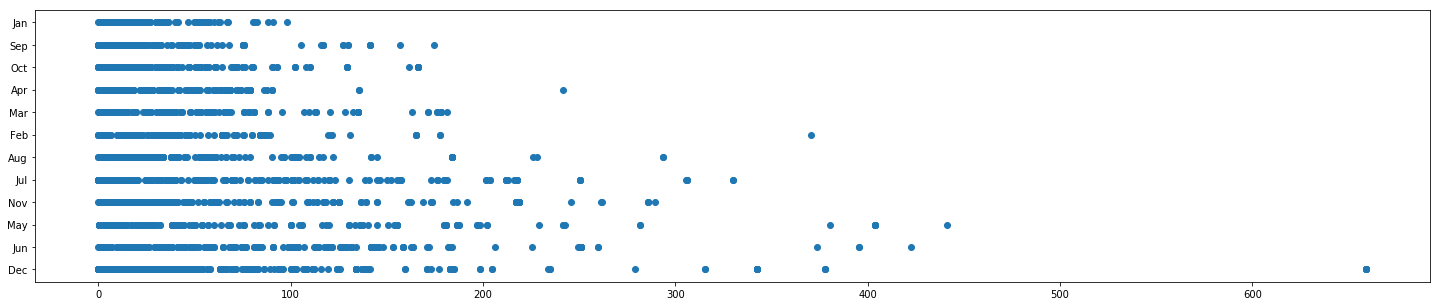

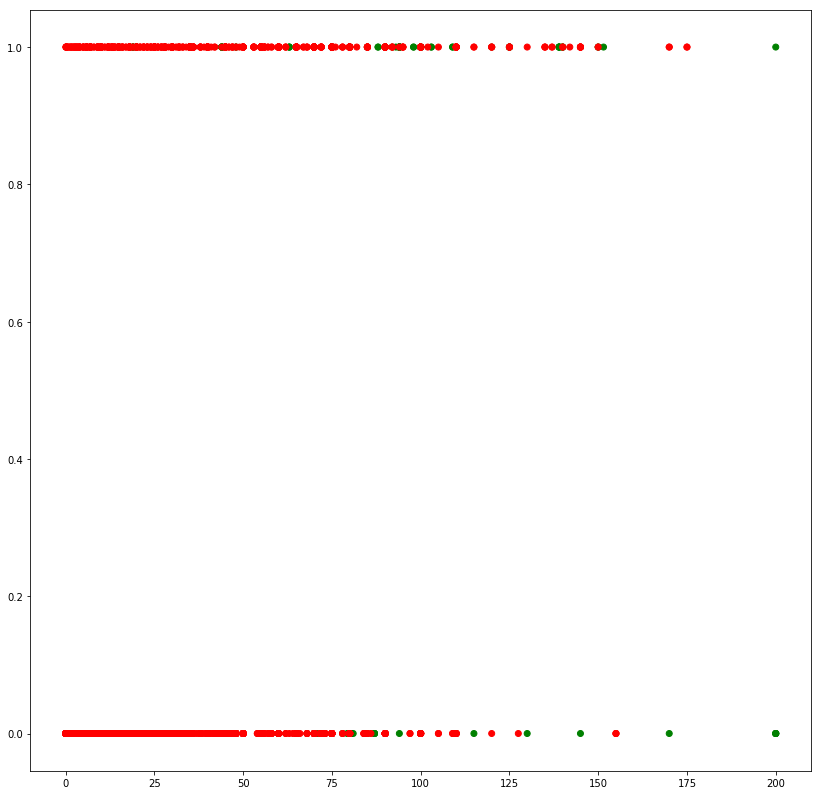

Index(['title', 'Month', 'year', 'Budget($M)', 'Domestic Gross($M)',
       'Worldwide Gross($M)', 'length', 'budget', 'rating', 'votes', 'mpaa',
       'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance',
       'Short', 'bechdel', 'Genre', 'Director', 'Writer', 'Actors', 'Language',
       'Country', 'Awards', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID',
       'lame', 'label'],
      dtype='object')
Index(['title', 'month', 'year', 'budget', 'Domestic Gross($M)',
       'Worldwide Gross($M)', 'length', 'budget', 'rating', 'votes', 'mpaa',
       'action', 'animation', 'comedy', 'drama', 'documentary', 'romance',
       'short', 'bechdel', 'genre', 'director', 'writer', 'actors', 'language',
       'country', 'awards', 'metascore', 'imdbRating', 'imdbVotes', 'imdbID',
       'lame', 'label'],
      dtype='object')


,title,month,year,budget,Domestic Gross($M),Worldwide Gross($M),length,budget,rating,votes,...,actors,language,country,awards,metascore,imdbRating,imdbVotes,imdbID,lame,label
0,Titanic,Dec,1997,200.0,659.363944,2208.208395,194,200000000.0,6.9,90195,...,"Leonardo DiCaprio, Kate Winslet, Billy Zane, K...",English,USA,Won 11 Oscars. Another 110 wins & 73 nominations.,74.0,7.7,"806,925",tt0120338,1,1
5,The Lord of the Rings: The Return of the King,Dec,2003,94.0,377.845905,1141.403341,251,94000000.0,9.0,103631,...,"Noel Appleby, Ali Astin, Sean Astin, David Aston","English, Quenya, Old English, Sindarin","USA, New Zealand",Won 11 Oscars. Another 174 wins & 113 nominati...,94.0,8.9,"1,238,528",tt0167260,1,1
8,Jurassic Park,Jun,1993,63.0,395.708305,1038.812584,127,63000000.0,7.4,57473,...,"Sam Neill, Laura Dern, Jeff Goldblum, Richard ...","English, Spanish",USA,Won 3 Oscars. Another 28 wins & 17 nominations.,68.0,8.1,"627,863",tt0107290,1,1
10,The Lion King,Jun,1994,79.3,422.780140,987.451390,89,79300000.0,7.8,32924,...,"Matthew Broderick, Jonathan Taylor Thomas, Jam...","English, Swahili, Xhosa, Zulu",USA,Won 2 Oscars. Another 32 wins & 30 nominations.,83.0,8.5,"655,322",tt0110357,1,1
11,Shrek 2,May,2004,70.0,441.226247,937.008132,92,75000000.0,7.8,27236,...,"Mike Myers, Eddie Murphy, Cameron Diaz, Julie ...",English,USA,Nominated for 2 Oscars. Another 16 wins & 48 n...,75.0,7.2,"318,647",tt0298148,1,1


In [97]:
# Bring in datasets
path = 'datasets/'

dataset1_name = 'MovieBudgetsAndBoxOfficeEarnings.csv'
df1 = pd.read_csv(os.path.join(path, dataset1_name))

dataset2_name = 'IMDBMovieDatabase.csv'
df2 = pd.read_csv(os.path.join(path, dataset2_name))

dataset3_name = 'BechdelTest.csv'
df3 = pd.read_csv(os.path.join(path, dataset3_name))

dataset4_name = 'film_data.csv'
df4 = pd.read_csv(os.path.join(path, dataset4_name), error_bad_lines=False)


# Method to fix titles to be uniform
def title_fix(title):
    if title[-5:] == ", The":
        return "The " + title[:-5]
    elif title[-3:] == ", A":
        return "A " + title[:-3]
    return title


# Set up individual datasets for merge
# Fix titles to be uniform
df1['title'] = df1['title'].apply(title_fix)
df2['title'] = df2['title'].apply(title_fix)

# Only pull in title & bechdel score
df3 = df3[["title", "binary"]].copy()
df3.rename(index=str, inplace = True, columns={"binary": "bechdel"})

# Rename Title to title to merge on
df4.rename(index=str, inplace = True, columns={"Title": "title"})

# Merge datasets
df = df1.merge(df2, on=['title', 'year'])
df = df.merge(df3, on='title', how='left')
df = df.merge(df4, on='title')
df.head()

# Data exploration
bins = pd.cut(df['Domestic Gross($M)'], bins=25).value_counts()
print(bins)

plt.figure(figsize=(25,5))
plt.scatter(x=df['Domestic Gross($M)'], y=df['Month'])

# Data exploration
df['lame'] = 1
nd = df[['lame', 'Domestic Gross($M)']].copy()
km = sk.cluster.KMeans(n_clusters=2)
km.fit(nd)
km.labels_
km.predict([[1,163]])
df.drop('lame', axis=1)
df.dropna()

# Data exploration
df['label'] = df['Domestic Gross($M)'].apply(lambda x: 1 if x >= 163 else 0)
plt.figure(figsize=(14,14))
plt.scatter(x=df['Budget($M)'], y=df['Action'], c=df['label'], cmap=colo.ListedColormap(['red', 'green']))
plt.show()

# Drop unnecessary columns
drop_list = ['Day','var1', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 
             'Plot', 'Type', 'Poster', 'Response', 'Year', 'Rated', 'Released', 'Runtime']

df = df.drop(drop_list, axis=1)
df.drop_duplicates(inplace=True)

print(df.keys())
rename_dict = {"Month": "month", "Budget($M)": "budget", "Action": "action", "Animation": "animation", 
               "Comedy": "comedy", "Drama": "drama", "Documentary": "documentary", "Romance": "romance", 
               "Short": "short", "Genre": "genre", "Director": "director", "Writer": "writer", "Actors":"actors",
              "Language": "language", "Country": "country", "Awards": "awards", "Metascore": "metascore"}

df.rename(index=str, inplace = True, columns=rename_dict)

# Set threshold based on data exploration
df['label'] = df['Domestic Gross($M)'].apply(lambda x: 1 if x >= 163 else 0)

print(df.keys())
df.head()

In [109]:
df['language'].value_counts()

English                                                                       1200
English, Spanish                                                                93
English, French                                                                 65
English, Italian                                                                33
English, Russian                                                                25
English, German                                                                 21
English, Japanese                                                               14
English, Latin                                                                  12
English, French, Spanish                                                        11
English, Mandarin                                                                8
English, German, French                                                          7
English, American Sign Language                                                  7
Engl

# THIS IS WHERE WE START DUPLICATING CODE - FIX FOR CLEAN UP LATER

In [98]:
# Method to fix titles to be uniform
def title_fix(title):
    if title[-5:] == ", The":
        return "The " + title[:-5]
    elif title[-3:] == ", A":
        return "A " + title[:-3]
    return title

In [69]:
# Set up individual datasets for merge
# Fix titles to be uniform
df1['title'] = df1['title'].apply(title_fix)
df2['title'] = df2['title'].apply(title_fix)

# Only pull in title & bechdel score
df3 = df3[["title", "binary"]].copy()
df3.rename(index=str, inplace = True, columns={"binary": "bechdel"})

# Rename Title to title to merge on
df4.rename(index=str, inplace = True, columns={"Title": "title"})

In [70]:
# Merge datasets
df = df1.merge(df2, on=['title', 'year'])
df = df.merge(df3, on='title', how='left')
df = df.merge(df4, on='title')
df.head()

,title,Month,Day,year,Budget($M),Domestic Gross($M),Worldwide Gross($M),var1,length,budget,...,Language,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,imdbID,Type,Response
0,Titanic,Dec,19,1997,200.0,659.363944,2208.208395,52348,194,200000000.0,...,English,USA,Won 11 Oscars. Another 110 wins & 73 nominations.,https://images-na.ssl-images-amazon.com/images...,74.0,7.7,"806,925",tt0120338,movie,True
1,Titanic,Dec,19,1997,200.0,659.363944,2208.208395,52348,194,200000000.0,...,English,USA,Won 11 Oscars. Another 110 wins & 73 nominations.,https://images-na.ssl-images-amazon.com/images...,74.0,7.7,"806,925",tt0120338,movie,True
2,Titanic,Dec,19,1997,200.0,659.363944,2208.208395,52348,194,200000000.0,...,English,USA,Won 11 Oscars. Another 110 wins & 73 nominations.,https://images-na.ssl-images-amazon.com/images...,74.0,7.7,"806,925",tt0120338,movie,True
3,Titanic,Dec,19,1997,200.0,659.363944,2208.208395,52348,194,200000000.0,...,English,USA,Won 11 Oscars. Another 110 wins & 73 nominations.,https://images-na.ssl-images-amazon.com/images...,74.0,7.7,"806,925",tt0120338,movie,True
4,Titanic,Dec,19,1997,200.0,659.363944,2208.208395,52348,194,200000000.0,...,English,USA,Won 11 Oscars. Another 110 wins & 73 nominations.,https://images-na.ssl-images-amazon.com/images...,74.0,7.7,"806,925",tt0120338,movie,True


(-0.659, 26.375]      1308
(26.375, 52.749]       632
(52.749, 79.124]       372
(79.124, 105.498]      187
(105.498, 131.873]     134
(131.873, 158.247]      83
(158.247, 184.622]      78
(210.996, 237.371]      34
(184.622, 210.996]      24
(237.371, 263.746]      21
(290.12, 316.495]        8
(316.495, 342.869]       8
(263.746, 290.12]        7
(395.618, 421.993]       7
(369.244, 395.618]       6
(632.989, 659.364]       5
(421.993, 448.367]       2
(606.615, 632.989]       0
(342.869, 369.244]       0
(448.367, 474.742]       0
(474.742, 501.117]       0
(501.117, 527.491]       0
(527.491, 553.866]       0
(553.866, 580.24]        0
(580.24, 606.615]        0
Name: Domestic Gross($M), dtype: int64


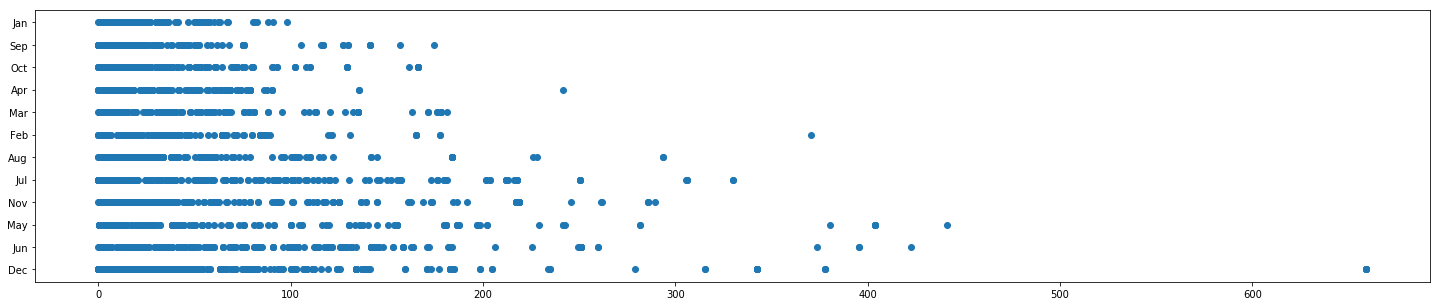

In [71]:
# Data exploration
bins = pd.cut(df['Domestic Gross($M)'], bins=25).value_counts()
print(bins)

plt.figure(figsize=(25,5))
plt.scatter(x=df['Domestic Gross($M)'], y=df['Month'])

In [72]:
# Data exploration
df['lame'] = 1
nd = df[['lame', 'Domestic Gross($M)']].copy()
km = sk.cluster.KMeans(n_clusters=2)
km.fit(nd)
km.labels_
km.predict([[1,163]])
df.drop('lame', axis=1)
df.dropna()

,title,Month,Day,year,Budget($M),Domestic Gross($M),Worldwide Gross($M),var1,length,budget,...,Country,Awards,Poster,Metascore,imdbRating,imdbVotes,imdbID,Type,Response,lame
0,Titanic,Dec,19,1997,200.000,659.363944,2208.208395,52348,194,200000000.0,...,USA,Won 11 Oscars. Another 110 wins & 73 nominations.,https://images-na.ssl-images-amazon.com/images...,74.0,7.7,"806,925",tt0120338,movie,True,1
1,Titanic,Dec,19,1997,200.000,659.363944,2208.208395,52348,194,200000000.0,...,USA,Won 11 Oscars. Another 110 wins & 73 nominations.,https://images-na.ssl-images-amazon.com/images...,74.0,7.7,"806,925",tt0120338,movie,True,1
2,Titanic,Dec,19,1997,200.000,659.363944,2208.208395,52348,194,200000000.0,...,USA,Won 11 Oscars. Another 110 wins & 73 nominations.,https://images-na.ssl-images-amazon.com/images...,74.0,7.7,"806,925",tt0120338,movie,True,1
3,Titanic,Dec,19,1997,200.000,659.363944,2208.208395,52348,194,200000000.0,...,USA,Won 11 Oscars. Another 110 wins & 73 nominations.,https://images-na.ssl-images-amazon.com/images...,74.0,7.7,"806,925",tt0120338,movie,True,1
4,Titanic,Dec,19,1997,200.000,659.363944,2208.208395,52348,194,200000000.0,...,USA,Won 11 Oscars. Another 110 wins & 73 nominations.,https://images-na.ssl-images-amazon.com/images...,74.0,7.7,"806,925",tt0120338,movie,True,1
5,The Lord of the Rings: The Return of the King,Dec,17,2003,94.000,377.845905,1141.403341,30659,251,94000000.0,...,"USA, New Zealand",Won 11 Oscars. Another 174 wins & 113 nominati...,https://images-na.ssl-images-amazon.com/images...,94.0,8.9,"1,238,528",tt0167260,movie,True,1
6,The Lord of the Rings: The Return of the King,Dec,17,2003,94.000,377.845905,1141.403341,30659,251,94000000.0,...,"USA, New Zealand",Won 11 Oscars. Another 174 wins & 113 nominati...,https://images-na.ssl-images-amazon.com/images...,94.0,8.9,"1,238,528",tt0167260,movie,True,1
7,The Lord of the Rings: The Return of the King,Dec,17,2003,94.000,377.845905,1141.403341,30659,251,94000000.0,...,"USA, New Zealand",Won 11 Oscars. Another 174 wins & 113 nominati...,https://images-na.ssl-images-amazon.com/images...,94.0,8.9,"1,238,528",tt0167260,movie,True,1
11,Shrek 2,May,19,2004,70.000,441.226247,937.008132,46649,92,75000000.0,...,USA,Nominated for 2 Oscars. Another 16 wins & 48 n...,https://images-na.ssl-images-amazon.com/images...,75.0,7.2,"318,647",tt0298148,movie,True,1
13,The Lord of the Rings: The Two Towers,Dec,18,2002,94.000,342.548984,934.699645,30660,223,94000000.0,...,"USA, New Zealand",Won 2 Oscars. Another 114 wins & 127 nominations.,https://images-na.ssl-images-amazon.com/images...,88.0,8.7,"1,120,701",tt0167261,movie,True,1


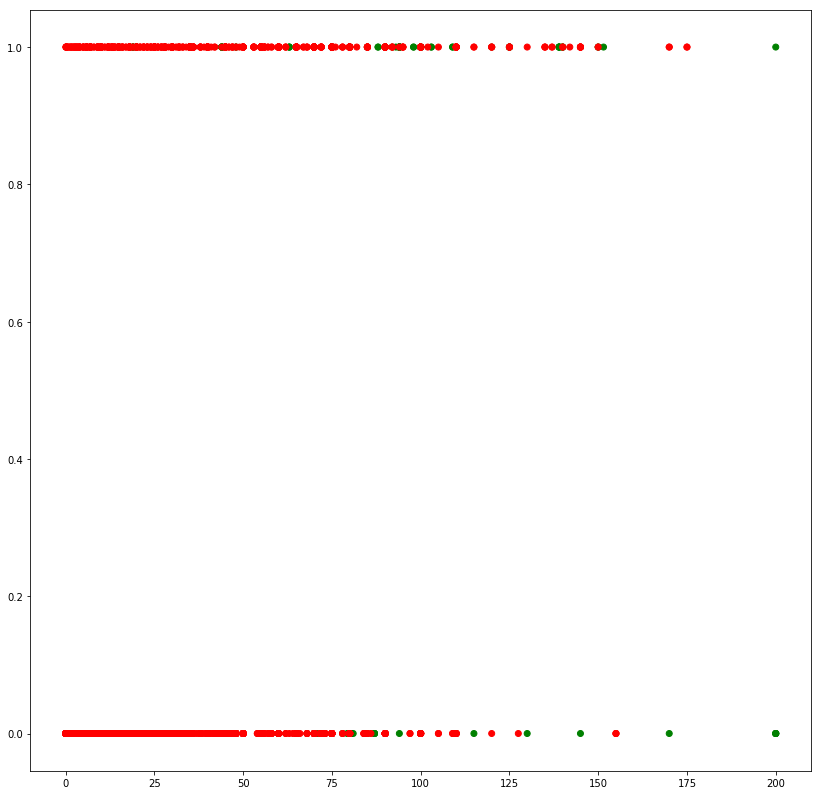

In [54]:
# Data exploration
df['label'] = df['Domestic Gross($M)'].apply(lambda x: 1 if x >= 163 else 0)
plt.figure(figsize=(14,14))
plt.scatter(x=df['Budget($M)'], y=df['Action'], c=df['label'], cmap=colo.ListedColormap(['red', 'green']))
plt.show()

In [62]:
# Drop unnecessary columns
drop_list = ['Day','var1', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 
             'Plot', 'Type', 'Poster', 'Response']

df = df.drop(drop_list, axis=1)
df.drop_duplicates(inplace=True)

print(df.keys())
rename_dict = {"Month": "month", "Budget($M)": "budget", "Action": "action", "Animation": "animation", 
               "Comedy": "comedy", "Drama": "drama", "Documentary": "documentary", "Romance": "romance", 
               "Short": "short"}

df.rename(index=str, inplace = True, columns=rename_dict)


df.head()

KeyError: "['Day' 'var1' 'r1' 'r2' 'r3' 'r4' 'r5' 'r6' 'r7' 'r8' 'r9' 'r10' 'Plot'\n 'Type' 'Poster' 'Response'] not found in axis"

In [56]:
# Try to drop non-English films?
# imdb_films = imdb_films[imdb_films.Language != 'English']

# indices = df[df.Language == 'English'].index
# df4.drop(indices, inplace=True)

# df = df[df.Language != 'English']
# print(imdb_films)

In [57]:
# Set threshold based on data exploration
df['label'] = df['Domestic Gross($M)'].apply(lambda x: 1 if x >= 163 else 0)

In [58]:
# put dataframe into a csv file
resulting_csv = "result_data.csv"
df.to_csv((path + resulting_csv), index=False)

In [59]:
# Upload dataset
ds.delete_dataset(resulting_csv)
status, dataset = ds.upload_dataset(os.path.join(path, resulting_csv))
if not status:
    print(dataset)

In [15]:
# clean dataset
target = "label"
status, job_id = ds.clean_data(resulting_csv, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-02T22:03:47.153148', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['result_data.csv'], 'artifact_names': ['f31a55166a474735a9ca69d1c3e0121e'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-02T22:03:47.153148', 'endtime': '2019-04-02T22:03:49.756173', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['result_data.csv'], 'artifact_names': ['f31a55166a474735a9ca69d1c3e0121e'], 'model_name': None, 'job_error': ''}


In [16]:
ds.delete_model(target+"_model")
model = target + "_model"
status, job_id = ds.create_model(dataset_names = resulting_csv, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-02T22:04:04.353353', 'endtime': None, 'percent_complete': 0, 'job_type': 'TrainModel', 'loss': None, 'generations': 0, 'dataset_names': ['result_data.csv'], 'artifact_names': None, 'model_name': 'label_model', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-02T22:04:04.353353', 'endtime': None, 'percent_complete': 2, 'job_type': 'TrainModel', 'loss': 0.3580731451511383, 'generations': 3, 'dataset_names': ['result_data.csv'], 'artifact_names': None, 'model_name': 'label_model', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T22:04:04.353353', 'endtime': None, 'percent_complete': 2, 'job_type': 'TrainModel', 'loss': 0.3580731451511383, 'generations': 3, 'dataset_names': ['result_data.csv'], 'artifact_names': None, 'model_name': 'label_model', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T22:04:04.353353', 'endtime': None, 'percent_complete': 2, 'job_type': 'TrainModel', 'loss': 0.35807314515113

In [17]:
# Train some more
status, job_id = ds.resume_training_model(dataset_names = resulting_csv,
                                          model_name = model,
                                          max_train_time = '00:05')
                                          
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-02T22:06:21.095601', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.1066145971417427, 'generations': 3, 'dataset_names': ['result_data.csv'], 'artifact_names': None, 'model_name': 'label_model', 'job_error': None}
{'status': 'Running', 'starttime': '2019-04-02T22:06:21.095601', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.1066145971417427, 'generations': 6, 'dataset_names': ['result_data.csv'], 'artifact_names': None, 'model_name': 'label_model', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T22:06:21.095601', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss': 0.1066145971417427, 'generations': 6, 'dataset_names': ['result_data.csv'], 'artifact_names': None, 'model_name': 'label_model', 'job_error': ''}
{'status': 'Running', 'starttime': '2019-04-02T22:06:21.095601', 'endtime': None, 'percent_complete': 0, 'job_type': 'UpdateModel', 'loss'

In [18]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Complete', 'starttime': '2019-04-02T22:10:08.144717', 'endtime': '2019-04-02T22:10:09.330826', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.09840010851621628, 'generations': 9, 'dataset_names': None, 'artifact_names': ['181b4dde347b41489aa02727cd0df4cd'], 'model_name': 'label_model', 'job_error': ''}


In [19]:
feature_importance[0:]

votes              0.343903
rating             0.140570
budget             0.131549
length             0.075550
year               0.043992
month = May        0.035126
mpaa = R           0.033636
action = 1         0.025912
bechdel = PASS     0.024533
drama = 1          0.022272
mpaa = PG-13       0.021726
mpaa = PG          0.014076
month = Jul        0.012854
animation = 1      0.012813
comedy = 1         0.011819
month = Feb        0.008757
month = Dec        0.008165
month = Nov        0.006599
romance = 1        0.006002
month = Jun        0.005206
month = Aug        0.004567
month = Oct        0.004141
month = Mar        0.003195
month = Sep        0.002888
month = Jan        0.000136
documentary = 1    0.000013
short              0.000000
dtype: float64

In [20]:
status, artifact = ds.run_model(resulting_csv, model)
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-02T22:10:10.763727', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.09840010851621628, 'generations': 9, 'dataset_names': ['result_data.csv'], 'artifact_names': ['60f08fe548c64dc59249ed4539f3c988'], 'model_name': 'label_model', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-02T22:10:10.763727', 'endtime': '2019-04-02T22:10:18.769748', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.09840010851621628, 'generations': 9, 'dataset_names': ['result_data.csv'], 'artifact_names': ['60f08fe548c64dc59249ed4539f3c988'], 'model_name': 'label_model', 'job_error': ''}


(True, 'Job completed')

In [21]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,label,prob_0,prob_1
0,1,0.021711,0.978289
1,1,0.107719,0.892281
2,1,0.307413,0.692587
3,1,0.247017,0.752983
4,1,0.304795,0.695205


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1835
           1       0.76      0.50      0.60       100

   micro avg       0.97      0.97      0.97      1935
   macro avg       0.87      0.75      0.79      1935
weighted avg       0.96      0.97      0.96      1935



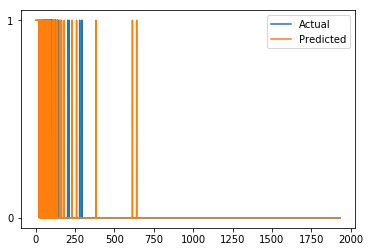

In [22]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

In [23]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

[{'layer 1': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 21}}}, {'layer 2': {'type': 'LinearGene', 'parameters': {'activation': 'selu', 'numunits': 66}}}, {'layer 3': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 2}}}]
